In [137]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv(f'data/data_final/df_static.csv')
df2 = pd.read_csv(f'data/data_final/df_dynamic.csv')

dic_agg_vehicle = {'aadt':'mean', 'co2': 'sum', 'co2_ff': 'sum',
       'mean_speed': 'mean', 'vkt': 'sum', 'weighted_speed': 'mean', 'co2_congestion': 'sum', 
       'consumption': 'sum', 'gini_bc': 'mean', 'gini_co2_total_congestion': 'mean'}
df2_agg_gini_co2 = df2.groupby(['city', 'year']).agg(dic_agg_vehicle).reset_index()
df2_agg2_bc = df2_agg_gini_co2.groupby('city').mean(numeric_only=True).reset_index()

df_gini_co2 = pd.merge(df1, df2_agg_gini_co2, on='city', how='right')

# remove panaji, chandigarh,
df_gini_co2 = df_gini_co2[~df_gini_co2['city'].isin(['panaji', 'chandigarh','jabalpur'])]

In [138]:
df_gini_co2.columns

Index(['city', 'population_2020', 'state', 'population_state',
       'GDP_2020(billion USD)', 'urban_area_km2', 'oe', 'vkt_public_transport',
       'rho_r', 'rho_i', 'rho_ratio', 'road_length_km', 'year', 'aadt', 'co2',
       'co2_ff', 'mean_speed', 'vkt', 'weighted_speed', 'co2_congestion',
       'consumption', 'gini_bc', 'gini_co2_total_congestion'],
      dtype='object')

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='road_length_km', y='co2_ff', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Road Length (km)')
axs[0].set_ylabel('CO2 freeflow (tons)')
axs[0].set_title('Road Length vs CO2 freeflow')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='road_length_km', y='co2_ff', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Road Length (km) (log scale)')
axs[1].set_ylabel('CO2 freeflow (tons, log scale)')
axs[1].set_title('Road Length vs CO2 freeflow (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/others/1.png', dpi=300, bbox_inches='tight')
plt.close()

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='rho_i', y='co2_congestion', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Rho_i (number/km²)')
axs[0].set_ylabel('CO2 Congestion (tons)')
axs[0].set_title('Rho_i vs CO2 Congestion')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='rho_i', y='co2_congestion', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Rho_i (log scale)')
axs[1].set_ylabel('CO2 Congestion (tons, log scale)')
axs[1].set_title('Rho_i vs CO2 Congestion (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/others/2.png', dpi=300, bbox_inches='tight')
plt.close()

In [144]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='rho_r', y='co2_congestion', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Rho_r (km/km²)')
axs[0].set_ylabel('CO2 Congestion (tons)')
axs[0].set_title('Rho_r vs CO2 Congestion')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='rho_r', y='co2_congestion', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Rho_r (log scale)')
axs[1].set_ylabel('CO2 Congestion (tons, log scale)')
axs[1].set_title('Rho_r vs CO2 Congestion (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/others/3.png', dpi=300, bbox_inches='tight')
plt.close()

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='rho_ratio', y='co2_congestion', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Rho_ratio')
axs[0].set_ylabel('CO2 Congestion (tons)')
axs[0].set_title('Rho_ratio vs CO2 Congestion')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='rho_ratio', y='co2_congestion', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Rho_ratio (log scale)')
axs[1].set_ylabel('CO2 Congestion (tons, log scale)')
axs[1].set_title('Rho_ratio vs CO2 Congestion (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/others/4.png', dpi=300, bbox_inches='tight')
plt.close()

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='gini_bc', y='co2_congestion', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Gini BC')
axs[0].set_ylabel('CO2 Congestion (tons)')
axs[0].set_title('Gini BC vs CO2 Congestion')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='gini_bc', y='co2_congestion', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Gini BC (log scale)')
axs[1].set_ylabel('CO2 Congestion (tons, log scale)')
axs[1].set_title('Gini BC vs CO2 Congestion (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/bc_comparison/1.png', dpi=300, bbox_inches='tight')
plt.close()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='gini_co2_total_congestion', y='co2_congestion', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Gini CO2 congestion')
axs[0].set_ylabel('CO2 Congestion (tons)')
axs[0].set_title('Gini CO2 congestion vs CO2 Congestion')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='gini_co2_total_congestion', y='co2_congestion', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Gini CO2 congestion (log scale)')
axs[1].set_ylabel('CO2 Congestion (tons, log scale)')
axs[1].set_title('Gini CO2 congestion vs CO2 Congestion (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/co2_comparison/1.png', dpi=300, bbox_inches='tight')
plt.close()

In [125]:
df_gini_co2['co2_congestion_pc'] = df_gini_co2['co2_congestion'] / df_gini_co2['population_2020']

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='gini_bc', y='co2_congestion_pc', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Gini BC')
axs[0].set_ylabel('CO2 Congestion per capita (tons/person)')
axs[0].set_title('Gini BC vs CO2 Congestion per capita')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='gini_bc', y='co2_congestion_pc', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Gini BC (log scale)')
axs[1].set_ylabel('CO2 Congestion per capita (tons/person, log scale)')
axs[1].set_title('Gini BC vs CO2 Congestion per capita (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/bc_comparison/2.png', dpi=300, bbox_inches='tight')
plt.close()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='gini_co2_total_congestion', y='co2_congestion_pc', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Gini CO2 congestion')
axs[0].set_ylabel('CO2 Congestion per capita (tons/person)')
axs[0].set_title('Gini CO2 congestion vs CO2 Congestion per capita')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='gini_co2_total_congestion', y='co2_congestion_pc', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Gini CO2 congestion (log scale)')
axs[1].set_ylabel('CO2 Congestion per capita (tons/person, log scale)')
axs[1].set_title('Gini CO2 congestion vs CO2 Congestion per capita (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/co2_comparison/2.png', dpi=300, bbox_inches='tight')
plt.close()

In [124]:
df_gini_co2['co2_congestion_vkt'] = df_gini_co2['co2_congestion'] / df_gini_co2['vkt']

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='gini_bc', y='co2_congestion_vkt', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Gini BC')
axs[0].set_ylabel('CO2 Congestion per VKT (tons/km)')
axs[0].set_title('Gini BC vs CO2 Congestion per VKT')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='gini_bc', y='co2_congestion_vkt', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Gini BC (log scale)')
axs[1].set_ylabel('CO2 Congestion per VKT (tons/km, log scale)')
axs[1].set_title('Gini BC vs CO2 Congestion per VKT (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/bc_comparison/3.png', dpi=300, bbox_inches='tight')
plt.close()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='gini_co2_total_congestion', y='co2_congestion_vkt', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Gini CO2 congestion')
axs[0].set_ylabel('CO2 Congestion per VKT (tons/km)')
axs[0].set_title('Gini CO2 congestion vs CO2 Congestion per VKT')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='gini_co2_total_congestion', y='co2_congestion_vkt', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Gini CO2 congestion (log scale)')
axs[1].set_ylabel('CO2 Congestion per VKT (tons/km, log scale)')
axs[1].set_title('Gini CO2 congestion vs CO2 Congestion per VKT (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/co2_comparison/3.png', dpi=300, bbox_inches='tight')
plt.close()

In [123]:
df_gini_co2['co2_congestion_area'] = df_gini_co2['co2_congestion'] / df_gini_co2['urban_area_km2']
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='gini_bc', y='co2_congestion_area', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Gini BC')
axs[0].set_ylabel('CO2 Congestion per Area (tons/km²)')
axs[0].set_title('Gini BC vs CO2 Congestion per Area')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='gini_bc', y='co2_congestion_area', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Gini BC (log scale)')
axs[1].set_ylabel('CO2 Congestion per Area (tons/km², log scale)')
axs[1].set_title('Gini BC vs CO2 Congestion per Area (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/bc_comparison/4.png', dpi=300, bbox_inches='tight')
plt.close()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Linear scale
sns.scatterplot(
       data=df_gini_co2, x='gini_co2_total_congestion', y='co2_congestion_area', hue='year', palette='deep', ax=axs[0]
)
axs[0].set_xlabel('Gini CO2 congestion')
axs[0].set_ylabel('CO2 Congestion per Urban Area (tons/km²)')
axs[0].set_title('Gini CO2 congestion vs CO2 Congestion per Area')
axs[0].legend(title='Year')

# Log scale
sns.scatterplot(
       data=df_gini_co2, x='gini_co2_total_congestion', y='co2_congestion_area', hue='year', palette='deep', ax=axs[1], legend=False
)
axs[1].set_xlabel('Gini CO2 congestion (log scale)')
axs[1].set_ylabel('CO2 Congestion per Urban Area (tons/km², log scale)')
axs[1].set_title('Gini CO2 congestion vs CO2 Congestion per Area (log y)')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.savefig('data/gini/co2_comparison/4.png', dpi=300, bbox_inches='tight')
plt.close()

In [3]:
city_latlon = {
    "kohima": (25.6747, 94.1100),
    "panaji": (15.4909, 73.8278),
    "itanagar": (27.0844, 93.6053),
    "gangtok": (27.3389, 88.6065),
    "shilong": (25.5788, 91.8933),
    "nalgonda": (17.0575, 79.2671),
    "shimla": (31.1048, 77.1734),
    "imphal": (24.8170, 93.9368),
    "rourkela": (22.2604, 84.8536),
    "siliguri": (26.7271, 88.3953),
    "durgapur": (23.5204, 87.3119),
    "dewas": (22.9659, 76.0553),
    "aizawl": (23.7271, 92.7176),
    "haldia": (22.0667, 88.0698),
    "sagar": (23.8388, 78.7378),
    "jabalpur": (23.1815, 79.9864),
    "thoothukkudi": (8.7642, 78.1348),
    "shivamogga": (13.9299, 75.5681),
    "kurnool": (15.8222, 78.0350),
    "jalpaiguri": (26.5170, 88.7196),
    "korba": (22.3475, 82.6966),
    "alwar": (27.5529, 76.6346),
    "silchar": (24.8273, 92.7979),
    "udaipur": (24.5854, 73.7125),
    "erode": (11.3410, 77.7172),
    "muzaffarpur": (26.1220, 85.3906),
    "ujjain": (23.1793, 75.7849),
    "kolhapur": (16.7050, 74.2433),
    "agartala": (23.8315, 91.2868),
    "sangli-miraj-kupwad": (16.8524, 74.5815),
    "gaya": (24.7969, 85.0002),
    "nellore": (14.4426, 79.9865),
    "jalgaon": (21.0077, 75.5626),
    "bhilainagar": (21.1950, 81.3509),
    "jhansi": (25.4484, 78.5685),
    "mangaluru": (12.9141, 74.8560),
    "patiala": (30.3398, 76.3869),
    "amravati": (20.9374, 77.7796),
    "dehradun": (30.3165, 78.0322),
    "guntur": (16.3067, 80.4365),
    "firozabad": (27.1496, 78.3949),
    "tiruppur": (11.1085, 77.3411),
    "chandigarh": (30.7333, 76.7794),
    "cuttack": (20.4625, 85.8828),
    "warangal": (17.9784, 79.5941),
    "mysuru": (12.2958, 76.6394),
    "jammu": (32.7266, 74.8570),
    "srinagar": (34.0837, 74.7973),
    "bhubaneswar": (20.2961, 85.8245),
    "vijaywada": (16.5062, 80.6480),
    "aligarh": (27.8974, 78.0880),
    "jodhpur": (26.2389, 73.0243),
    "hubli dharwad": (15.3647, 75.1240),
    "kochi": (9.9312, 76.2673),
    "solapur": (17.6599, 75.9064),
    "tiruchirappalli": (10.7905, 78.7047),
    "gurgaon": (28.4595, 77.0266),
    "jalandhar": (31.3260, 75.5762),
    "guwahati": (26.1445, 91.7362),
    "amritsar": (31.6340, 74.8723),
    "raipur": (21.2514, 81.6296),
    "bareilly": (28.3670, 79.4304),
    "kota": (25.2138, 75.8648),
    "noida": (28.5355, 77.3910),
    "rajkot": (22.3039, 70.8022),
    "moradabad": (28.8386, 78.7733),
    "aurangabad": (19.8762, 75.3433),
    "ranchi": (23.3441, 85.3096),
    "gwalior": (26.2183, 78.1828),
    "jamshedpur": (22.8046, 86.2029),
    "coimbatore": (11.0168, 76.9558),
    "meerut": (28.9845, 77.7064),
    "dhanbad": (23.7957, 86.4304),
    "allahabad": (25.4358, 81.8463),
    "madurai": (9.9252, 78.1198),
    "nashik": (19.9975, 73.7898),
    "ludhiana": (30.9005, 75.8573),
    "faridabad": (28.4089, 77.3178),
    "vadodara": (22.3072, 73.1812),
    "varanashi": (25.3176, 82.9739),
    "agra": (27.1767, 78.0081),
    "thiruvananthapuram": (8.5241, 76.9366),
    "vishakhapatnam": (17.6868, 83.2185),
    "patna": (25.5941, 85.1376),
    "ghaziabad": (28.6692, 77.4538),
    "bhopal": (23.2599, 77.4126),
    "nagpur": (21.1458, 79.0882),
    "indore": (22.7196, 75.8577),
    "kanpur": (26.4499, 80.3319),
    "jaipur": (26.9124, 75.7873),
    "lucknow": (26.8467, 80.9462),
    "pune": (18.5204, 73.8567),
    "surat": (21.1702, 72.8311),
    "kolkata": (22.5726, 88.3639),
    "hyderabad": (17.3850, 78.4867),
    "chennai": (13.0827, 80.2707),
    "ahmedabad": (23.0225, 72.5714),
    "bengaluru": (12.9716, 77.5946),
    "mumbai": (19.0760, 72.8777),
    "delhi": (28.6139, 77.2090)
}
df['lat'] = df['city'].map(lambda x: city_latlon[x][0] if x in city_latlon else None)
df['lon'] = df['city'].map(lambda x: city_latlon[x][1] if x in city_latlon else None)

In [4]:
df.to_csv('data/stats.csv', index=False)

In [5]:
df2021 = df[df['year'] == 2021].copy()

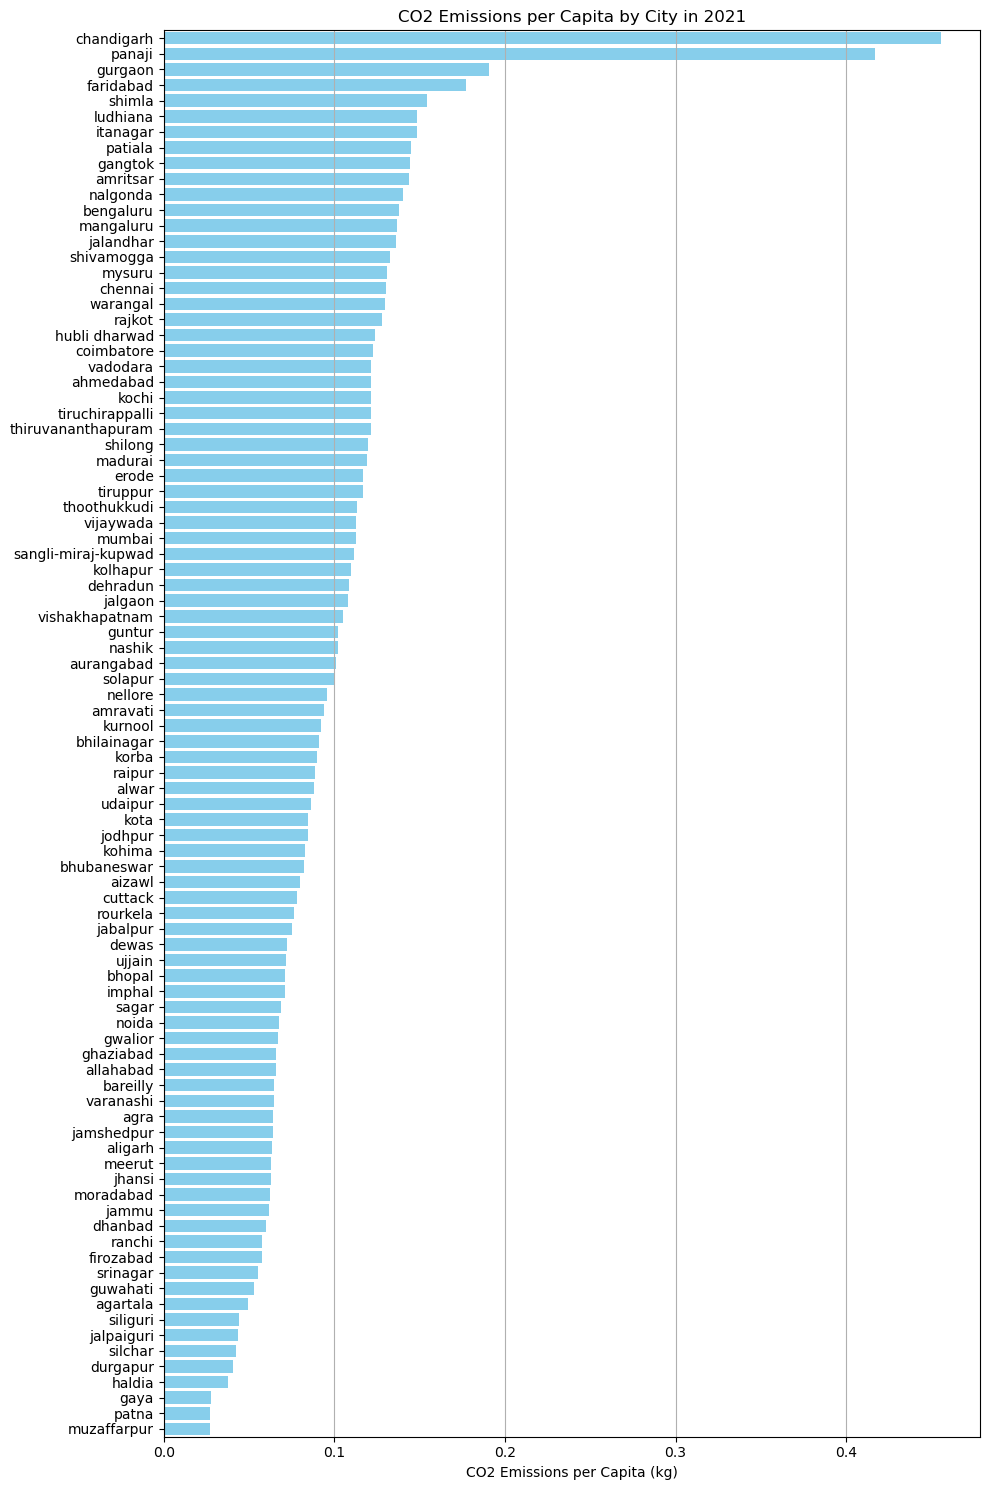

In [12]:
# bar plot co2_pc
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 15))
df2021.sort_values('co2_pc', ascending=True, inplace=True)
plt.barh(df2021['city'], df2021['co2_pc'], color='skyblue')
plt.xlabel('CO2 Emissions per Capita (kg)')
plt.title('CO2 Emissions per Capita by City in 2021')
# remove gaps in y-axis beginning and end
plt.gca().set_ylim(-0.5, len(df2021) - 0.5)
plt.grid(axis='x')
plt.tight_layout()

In [9]:
import pandas as pd

df = pd.read_csv('data/df_gini.csv')
df = df[df['city'] != 'jabalpur']


In [ ]:
orientation_df = pd.DataFrame(city_latlon)

,city,year,gini_bc,gini_co2_car,gini_co2_truck,gini_co2_total
0,shimla,2021,0.911384,0.547706,0.544597,0.543305
1,shimla,2022,0.911384,0.541072,0.555854,0.542937
2,shimla,2023,0.911384,0.536826,0.531930,0.533678
3,jamshedpur,2021,0.901402,0.522471,0.499645,0.510074
4,jamshedpur,2022,0.901402,0.547908,0.498954,0.532190
...,...,...,...,...,...,...
265,sagar,2022,0.834417,0.496549,0.482764,0.489054
266,sagar,2023,0.834417,0.488705,0.473235,0.478391
267,nellore,2021,0.886079,0.489894,0.475797,0.479345
268,nellore,2022,0.886079,0.490035,0.484830,0.485940


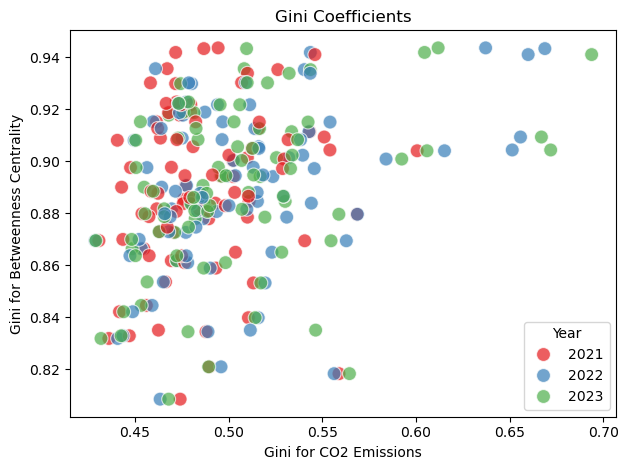

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(
      data=df,
      x='gini_co2_total', y='gini_bc', hue="year", s=100, alpha=0.7,
      palette="Set1")
# axes names
plt.xlabel('Gini for CO2 Emissions')
plt.ylabel('Gini for Betweenness Centrality')
plt.title('Gini Coefficients')
plt.legend(title='Year')
plt.tight_layout()

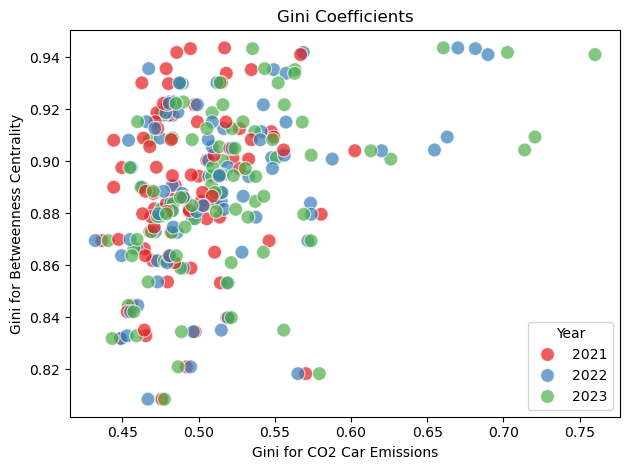

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(
      data=df,
      x='gini_co2_car', y='gini_bc', hue="year", s=100, alpha=0.7,
      palette="Set1")
# axes names
plt.xlabel('Gini for CO2 Car Emissions')
plt.ylabel('Gini for Betweenness Centrality')
plt.title('Gini Coefficients')
plt.legend(title='Year')
plt.tight_layout()

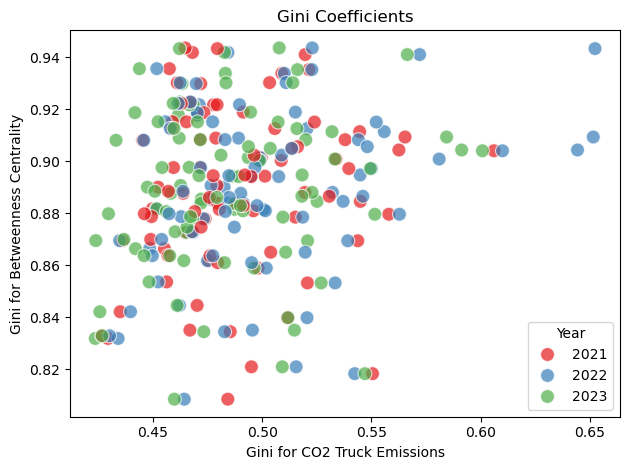

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(
      data=df,
      x='gini_co2_truck', y='gini_bc', hue="year", s=100, alpha=0.7,
      palette="Set1")
# axes names
plt.xlabel('Gini for CO2 Truck Emissions')
plt.ylabel('Gini for Betweenness Centrality')
plt.title('Gini Coefficients')
plt.legend(title='Year')
plt.tight_layout()

In [8]:
df.sort_values('gini_bc', ascending=True)

,city,year,gini_bc,gini_co2_car,gini_co2_truck,gini_co2_total
144,jabalpur,2021,0.499727,0.447779,0.453659,0.447072
146,jabalpur,2023,0.499727,0.455438,0.445591,0.448558
145,jabalpur,2022,0.499727,0.466083,0.469227,0.466037
263,jalpaiguri,2023,0.808469,0.477551,0.459777,0.468063
262,jalpaiguri,2022,0.808469,0.466783,0.464301,0.463522
...,...,...,...,...,...,...
259,bhopal,2022,0.943343,0.681587,0.652344,0.668827
260,bhopal,2023,0.943343,0.535382,0.462100,0.509654
228,chennai,2021,0.943616,0.517013,0.464709,0.494452
229,chennai,2022,0.943616,0.670113,0.522886,0.637210


In [67]:
import numpy as np
median_co2_pc = np.mean(pp["co2_pc"])

In [68]:
median_co2_pc

0.10137899014213557

In [72]:
pp[pp["co2_pc"] < median_co2_pc].shape

(50, 9)

In [69]:
pp.describe()

,population_2020,gdp_billions,urban_area_km2,year,co2,co2_pc,lat,lon
count,9.000000e+01,90.000000,90.000000,90.0,9.000000e+01,90.000000,90.000000,90.000000
mean,1.425392e+06,14.468057,186.804807,2021.0,1.491901e+05,0.101379,22.257907,80.038732
std,2.097501e+06,36.799033,156.578481,0.0,2.654774e+05,0.061802,6.248878,5.719594
min,1.104780e+05,0.097698,0.000000,2021.0,9.353845e+03,0.026862,8.524100,70.802200
25%,5.319950e+05,2.037289,81.601504,2021.0,4.451914e+04,0.064963,17.666625,75.943625
50%,9.641230e+05,4.979329,151.439733,2021.0,8.550030e+04,0.091845,23.302000,78.061500
75%,1.565450e+06,10.222653,220.081028,2021.0,1.361939e+05,0.121536,26.674575,83.157350
max,1.429355e+07,235.313496,753.051003,2021.0,1.646907e+06,0.455687,34.083700,94.110000


In [4]:
import numpy as np
df["co2_per_gdp"] = df["co2"] / df["gdp_billions"]    # tonnes/billions usd
df["gdp_per_fuel"] = df["gdp_billions"] / df["consumption"] # billions usd/tonnes
df["fuel_per_km"] = df["consumption"] / df["vkt"]      # tonnes/km
df["vkt_per_capita"] = df["vkt"] / df["population_2020"]   # km/person
df["co2_per_fuel"] = df["co2"] / df["consumption"]          # tonnes/tonne fuel

df["fuel_per_capita"] = df["consumption"] / df["population_2020"]   # tonnes or liters per person
df["urban_density"] = df["population_2020"] / df["urban_area_km2"]  # people per km²
df['sqrt_urban_area'] = np.sqrt(df['urban_area_km2'])

In [5]:
df.columns

Index(['city', 'year', 'vehicle', 'BC_TOTAL', 'BC_TOTAL_ff', 'CH4_TOTAL',
       'CH4_TOTAL_ff', 'CO_TOTAL', 'CO_TOTAL_ff', 'N2O_TOTAL', 'N2O_TOTAL_ff',
       'NH3_TOTAL', 'NH3_TOTAL_ff', 'NOX_TOTAL', 'NOX_TOTAL_ff', 'PB_TOTAL',
       'PB_TOTAL_ff', 'PM_10_TOTAL', 'PM_10_TOTAL_ff', 'PM_2.5_TOTAL',
       'PM_2.5_TOTAL_ff', 'VOC_TOTAL', 'VOC_TOTAL_ff', 'co2', 'co2_ff',
       'mean_speed', 'vkt', 'weighted_speed', 'consumption', 'population_2020',
       'urban_area_km2', 'gdp_billions', 'co2_congestion', 'lat', 'lon',
       'co2_pc', 'co2_per_gdp', 'gdp_per_fuel', 'fuel_per_km',
       'vkt_per_capita', 'co2_per_fuel', 'fuel_per_capita', 'urban_density',
       'sqrt_urban_area'],
      dtype='object')

In [28]:
df = pd.read_csv('data/data_annual_streamlit.csv')


In [29]:
df

,city,population_2020,gdp_billions,urban_area_km2,year,vehicle,BC_TOTAL,BC_TOTAL_ff,CH4_TOTAL,CH4_TOTAL_ff,...,PM_2.5_TOTAL_ff,VOC_TOTAL,VOC_TOTAL_ff,aadt,co2,co2_ff,mean_speed,vkt,weighted_speed,consumption
0,agartala,649084,4.810943,97.492401,2021,car,0.228729,0.226934,0.422926,0.416181,...,1.358553,7.239017,7.185986,195.998358,24670.986464,23623.502883,14.602144,7.076783e+07,15.929774,8954.665225
1,agartala,649084,4.810943,97.492401,2021,truck,0.434389,0.418184,0.118529,0.118529,...,0.890239,1.402184,1.334503,17.077989,7286.352418,6874.900672,13.907939,6.170184e+06,14.760309,783.460189
2,agartala,649084,4.810943,97.492401,2022,car,0.297147,0.291878,0.540510,0.521074,...,1.740028,9.415601,9.271410,259.423648,29821.162859,27187.944477,18.385316,9.338866e+07,20.122910,9784.904713
3,agartala,649084,4.810943,97.492401,2022,truck,0.275349,0.261928,0.075409,0.075409,...,0.559763,0.887836,0.831781,10.940968,4597.631477,4256.615909,13.867491,3.925500e+06,15.117501,476.273124
4,agartala,649084,4.810943,97.492401,2023,car,0.357276,0.351423,0.634877,0.614289,...,2.086891,11.368180,11.239431,318.636520,32939.859176,31008.586543,23.414893,1.148717e+08,25.515201,10373.307300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,warangal,926825,6.492598,452.370996,2021,truck,2.288175,2.245325,0.619362,0.619362,...,4.747262,7.404230,7.225317,22.909738,38910.980511,37832.211725,12.061921,3.224165e+07,13.103606,4469.234998
536,warangal,926825,6.492598,452.370996,2022,car,0.830960,0.826018,1.543414,1.524877,...,4.948518,26.339840,26.194956,183.598812,92718.750350,89787.684475,12.930652,2.562131e+08,13.883302,35720.841830
537,warangal,926825,6.492598,452.370996,2022,truck,1.373141,1.340299,0.375041,0.375041,...,2.843486,4.431612,4.294491,14.082558,23218.938720,22389.300777,12.925347,1.952321e+07,13.753586,2585.319867
538,warangal,926825,6.492598,452.370996,2023,car,0.956607,0.950641,1.765972,1.744040,...,5.688922,30.351085,30.190196,210.084612,104350.914747,101252.256319,14.062616,2.967898e+08,15.335407,38747.030954


In [ ]:
# plot weighted speed vs co2_pc
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_city, x='weighted_speed', y='co2_pc', hue='vehicle', alpha=0.7)
plt.title('Weighted Speed vs CO2 per Capita')
plt.xlabel('Weighted Speed (km/h)')
plt.ylabel('CO2 per Capita (kg)')
plt.legend(title='Vehicle Type')
plt.show()

In [ ]:

choices  = ['kohima', 'panaji', 'itanagar', 'gangtok', 'shilong', 'nalgonda', 'shimla', 'imphal', 'rourkela', 'siliguri',
  'durgapur', 'dewas', 'aizawl', 'haldia', 'sagar', 'jabalpur', 'thoothukkudi', 'shivamogga', 'kurnool', 
  'jalpaiguri', 'korba', 'alwar', 'silchar', 'udaipur', 'erode', 'muzaffarpur', 'ujjain', 'kolhapur', 
  'agartala', 'sangli-miraj-kupwad', 'gaya', 'nellore', 'jalgaon', 'bhilainagar', 'jhansi', 'mangaluru', 
  'patiala', 'amravati', 'dehradun', 'guntur', 'firozabad', 'tiruppur', 'chandigarh', 'cuttack', 'warangal', 
  'mysuru', 'jammu', 'srinagar', 'bhubaneswar', 'vijaywada', 'aligarh', 'jodhpur', 'hubli dharwad', 'kochi', 
  'solapur', 'tiruchirappalli', 'gurgaon', 'jalandhar', 'guwahati', 'amritsar', 'raipur', 'bareilly', 'kota', 
  'noida', 'rajkot', 'moradabad', 'aurangabad', 'ranchi', 'gwalior', 'jamshedpur', 'coimbatore', 'meerut', 
  'dhanbad', 'allahabad', 'madurai', 'nashik', 'ludhiana', 'faridabad', 'vadodara', 'varanashi', 'agra', 
  'thiruvananthapuram', 'vishakhapatnam', 'patna', 'ghaziabad', 'bhopal', 'nagpur', 'indore', 'kanpur', 
  'jaipur', 'lucknow', 'pune', 'surat', 'kolkata', 'hyderabad', 'chennai', 'ahmedabad', 'bengaluru', 'mumbai', 'delhi']

import pandas as pd
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import subprocess
import dask.dataframe as dd
import glob
import geopandas as gpd
import joblib
from tqdm import tqdm
from joblib import Parallel, delayed
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser

def parse_args():
	parser = ArgumentParser(formatter_class=ArgumentDefaultsHelpFormatter,
	                        conflict_handler='resolve')
	parser.add_argument('--city', default='kanpur', choices=choices, help='city')
	parser.add_argument('--year', default='2021', choices=['2020','2021','2022','2023','2024'], help='Choose year')
	args = parser.parse_args()
	return args

def main(args):
    city = args.city
    year = args.year

    check_path = f'data/data_stats/{city}/{year}/stats.csv'
    # Check if metrics.csv already exists
    if os.path.exists(check_path):
        print(f"stats for {city}, {year} already exist. Skipping this combination.")
        return

    # map df
    fp = f"data/data_clip/{city}/clip/streets.shp"
    map_df = gpd.read_file(fp)
    map_df.LINK_ID = map_df.LINK_ID.astype(str)
    map_df = map_df.to_crs(epsg=3857)
    map_df['length'] = map_df['geometry'].length / 1000 # in km
    dicc = dict(zip(map_df['LINK_ID'],map_df['length']))

    # get list of dc_files
    root = f'data/data_emission/{city}/{year}'
    df = dd.read_parquet(root, engine='pyarrow')

    cols = ['co2_car',
       'co2_truck', 'NOX_TOTAL_car', 'NOX_TOTAL_truck', 'PM_2.5_TOTAL_car',
       'PM_2.5_TOTAL_truck', 'PM_10_TOTAL_car', 'PM_10_TOTAL_truck',
       'CO_TOTAL_car', 'CO_TOTAL_truck', 'VOC_TOTAL_car', 'VOC_TOTAL_truck',
       'CH4_TOTAL_car', 'CH4_TOTAL_truck', 'N2O_TOTAL_car', 'N2O_TOTAL_truck',
       'NH3_TOTAL_car', 'NH3_TOTAL_truck', 'PB_TOTAL_car', 'PB_TOTAL_truck',
       'BC_TOTAL_car', 'BC_TOTAL_truck', 'co2_car_ff', 'co2_truck_ff',
       'NOX_TOTAL_car_ff', 'NOX_TOTAL_truck_ff', 'PM_2.5_TOTAL_car_ff',
       'PM_2.5_TOTAL_truck_ff', 'PM_10_TOTAL_car_ff', 'PM_10_TOTAL_truck_ff',
       'CO_TOTAL_car_ff', 'CO_TOTAL_truck_ff', 'VOC_TOTAL_car_ff',
       'VOC_TOTAL_truck_ff', 'CH4_TOTAL_car_ff', 'CH4_TOTAL_truck_ff',
       'N2O_TOTAL_car_ff', 'N2O_TOTAL_truck_ff', 'NH3_TOTAL_car_ff',
       'NH3_TOTAL_truck_ff', 'PB_TOTAL_car_ff', 'PB_TOTAL_truck_ff',
       'BC_TOTAL_car_ff', 'BC_TOTAL_truck_ff']
    
    # daily emissions
    df = df.groupby
    

    df_emissions = pd.DataFrame(df_emissions).reset_index() # in tons
    df_emissions.columns = ['variable','value']
    
    df_vkt = df[['LINK_ID','COUNT_car','COUNT_truck']].groupby('LINK_ID')['COUNT_car','COUNT_truck'].sum().reset_index().compute()
    df_vkt['link_len'] = df_vkt.LINK_ID.map(dicc)
    df_vkt.link_len = df_vkt.link_len.astype(float)
    df_vkt.COUNT_car = df_vkt.COUNT_car * df_vkt.link_len
    df_vkt.COUNT_truck = df_vkt.COUNT_truck * df_vkt.link_len
    # rename columns to vkt
    df_vkt = df_vkt.rename(columns={'COUNT_car':'vkt_car','COUNT_truck':'vkt_truck'})
    df_vkt = df_vkt[['vkt_car','vkt_truck']].sum()
    df_vkt = pd.DataFrame(df_vkt).reset_index()
    df_vkt.columns = ['variable','value']
    dff = pd.concat([df_emissions,df_vkt])

    # Weighted mean speed (using COUNT as weight)
    weighted_speed_car = (df["MEAN_car"] * df["COUNT_car"]).sum() / df["COUNT_car"].sum()
    weighted_speed_truck = (df["MEAN_truck"] * df["COUNT_truck"]).sum() / df["COUNT_truck"].sum()
    # add weighted mean speed to the dataframe DFF
    dff = dff.append({'variable': 'weighted_speed_car', 'value': weighted_speed_car.compute()}, ignore_index=True)
    dff = dff.append({'variable': 'weighted_speed_truck', 'value': weighted_speed_truck.compute()}, ignore_index=True)
    # add  mean speed to the dataframe DFF
    dff = dff.append({'variable': 'mean_speed_car', 'value': df["MEAN_car"].mean().compute()}, ignore_index=True)
    dff = dff.append({'variable': 'mean_speed_truck', 'value': df["MEAN_truck"].mean().compute()}, ignore_index=True)
    
    p = f'data/data_stats/{city}/{year}'
    os.makedirs(p, exist_ok=True)
    dff.to_csv(f'{p}/stats.csv', index=False)
    
def more_main():
	args = parse_args()
	main(args)

if __name__ == "__main__":
	more_main()

In [ ]:
shapefile = 'data/state/STATE_BOUNDARY.shp'
shapefile = gpd.read_file(shapefile)
shapefile = shapefile[~shapefile['STATE'].isin(['ANDAMAN & NICOBAR', 'LAKSHADWEEP','DISPUTED (MADHYA PRADESH & GUJAR>T)',
                                            'DISPUTED (MADHYA PRADESH & R>JASTH>N)', 'DISPUTED (R>JATH>N & GUJAR>T)',
                                                  'DISPUTED (WEST BENGAL , BIH>R & JH>RKHAND)'  ])]
fix = ['ANDHRA PRADESH', 'ARUN>CHAL PRADESH', 'ASSAM', 'BIH>R',
       'CHAND|GARH', 'CHHAtT|SGARH', 'D>DRA & NAGAR HAVELI & DAM>N & DIU',
       'DELHI', 'GOA', 'GUJAR>T', 'HARY>NA', 'HIM>CHAL PRADESH',
       'JAMMU AND KASHM|R', 'JH>RKHAND', 'KARN>TAKA', 'KERALA', 'LAD>KH',
       'MADHYA PRADESH', 'MAH>R>SHTRA', 'MANIPUR', 'MEGH>LAYA', 'MIZORAM',
       'N>G>LAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'R>JASTH>N',
       'SIKKIM', 'TAMIL N>DU', 'TELANG>NA', 'TRIPURA', 'UTTAR>KHAND',
       'UTTAR PRADESH', 'WEST BENGAL']

fixed = ['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHANDIGARH', 'CHHATTISGARH', 'DADRA & NAGAR HAVELI & DAMAN & DIU',
       'DELHI', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LADAKH',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN',
       'SIKKIM', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTARAKHAND',
       'UTTAR PRADESH', 'WEST BENGAL']

shapefile['STATE'] = shapefile['STATE'].replace(fix, fixed)
shapefile = shapefile.to_crs(epsg=4326)
shapefile = shapefile[['STATE', 'geometry']]
# Export to GeoJSON
shapefile.to_file("data/state.geojson", driver="GeoJSON")

In [4]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="date", y="co2_car",label='Car')
sns.lineplot(data=df, x="date", y="co2_truck",label='Truck')
plt.title(f"CO₂ emissions for {city}")
plt.xlabel("Date")
plt.ylabel("CO₂ emissions (tons)")
plt.savefig(src+f'plots/plots1/og/ts_co2_fleet/{city}.png')

NameError: name 'plt' is not defined

In [ ]:
# plot for january 2022
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.lineplot(data=df[df.date.dt.year.isin([2022]) & (df.date.dt.month == 1)], x="date", y="co2_car",label='Car')
sns.lineplot(data=df[df.date.dt.year.isin([2022]) & (df.date.dt.month == 1)], x="date", y="co2_truck",label='Truck')
plt.title(f"CO₂ emissions for {city}")
plt.xlabel("Date")
plt.ylabel("CO₂ emissions (tons)")
# mark sundays
plt.axvline(pd.Timestamp('2022-01-02'), color='red', linestyle='--', label='Sunday')
plt.axvline(pd.Timestamp('2022-01-09'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2022-01-16'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2022-01-23'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2022-01-30'), color='red', linestyle='--')
plt.legend()
plt.savefig(src+f'plots/plots1/og/ts_co2_fleet/{